### Data Importing 

In [91]:
#All the important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [92]:
df = pd.read_csv('price-range-of-hdb-flats-offered.csv')

In [93]:
df.head()

,financial_year,town,room_type,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg
0,2008,Punggol,2-room,82000,107000,0,0
1,2008,Punggol,3-room,135000,211000,0,0
2,2008,Punggol,4-room,223000,327000,0,0
3,2008,Punggol,5-room,305000,428000,0,0
4,2008,Jurong West,3-room,142000,160000,0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   financial_year                  277 non-null    int64 
 1   town                            277 non-null    object
 2   room_type                       277 non-null    object
 3   min_selling_price               277 non-null    int64 
 4   max_selling_price               277 non-null    int64 
 5   min_selling_price_less_ahg_shg  277 non-null    int64 
 6   max_selling_price_less_ahg_shg  277 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 15.3+ KB


In [95]:
df_2000 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df_2012 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df_2015 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df_2017 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
frames = [df_2000, df_2012, df_2015, df_2017]
result = pd.concat(frames)

In [96]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610400 entries, 0 to 151392
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                610400 non-null  object 
 1   town                 610400 non-null  object 
 2   flat_type            610400 non-null  object 
 3   block                610400 non-null  object 
 4   street_name          610400 non-null  object 
 5   storey_range         610400 non-null  object 
 6   floor_area_sqm       610400 non-null  float64
 7   flat_model           610400 non-null  object 
 8   lease_commence_date  610400 non-null  int64  
 9   resale_price         610400 non-null  float64
 10  remaining_lease      188546 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 55.9+ MB


# Data Cleaning

In [97]:
data = pd.read_csv('price-range-of-hdb-flats-offered.csv')

In [98]:
missing_values = data.isnull().sum()
print(missing_values)

financial_year                    0
town                              0
room_type                         0
min_selling_price                 0
max_selling_price                 0
min_selling_price_less_ahg_shg    0
max_selling_price_less_ahg_shg    0
dtype: int64


In [99]:
clean_data = data.dropna()

In [100]:
clean_data = data.drop_duplicates()

In [101]:
#Checking for the duplicate values
print(data.duplicated().sum())

0


In [102]:
#Checking all the missing values
print(data.isnull().sum())

financial_year                    0
town                              0
room_type                         0
min_selling_price                 0
max_selling_price                 0
min_selling_price_less_ahg_shg    0
max_selling_price_less_ahg_shg    0
dtype: int64


In [103]:
#Checking for the inconsistent values
print(data['town'].value_counts())

Punggol          47
Sengkang         39
Woodlands        35
Sembawang        31
Yishun           30
Choa Chu Kang    21
Jurong West      17
Bukit Panjang    17
Bukit Batok      16
Tengah           16
Hougang           4
Jurong East       4
Name: town, dtype: int64


In [104]:
clean_data.to_csv('cleaned_data.csv', index=False)

In [105]:
clean_result = result.copy()
clean_result = clean_result.dropna()
clean_result = result.drop_duplicates()

clean_result.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,NaN
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,NaN
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,NaN
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,NaN
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,NaN


In [107]:
clean_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609345 entries, 0 to 151392
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                609345 non-null  object 
 1   town                 609345 non-null  object 
 2   flat_type            609345 non-null  object 
 3   block                609345 non-null  object 
 4   street_name          609345 non-null  object 
 5   storey_range         609345 non-null  object 
 6   floor_area_sqm       609345 non-null  float64
 7   flat_model           609345 non-null  object 
 8   lease_commence_date  609345 non-null  int64  
 9   resale_price         609345 non-null  float64
 10  remaining_lease      188252 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 55.8+ MB


### Data Normalization

In [108]:
data = pd.read_csv('price-range-of-hdb-flats-offered.csv')
columns_to_normalize = ['min_selling_price', 'max_selling_price', 'min_selling_price_less_ahg_shg', 'max_selling_price_less_ahg_shg']
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.to_csv('normalized_data.csv', index=False)

### Data Transformation

In [109]:
# Extract the "room_type" column
room_type = df['room_type']

# Apply one-hot encoding to "room_type"
encoder = OneHotEncoder()
room_type_encoded = encoder.fit_transform(room_type.values.reshape(-1, 1))

# Add the encoded features back to the DataFrame
room_type_encoded_df = pd.DataFrame(room_type_encoded.toarray(), columns=encoder.get_feature_names_out(['room_type']))
rooms = room_type_encoded_df
df = pd.concat([df, rooms], axis=1)

# Drop the original "room_type" column
df = df.drop('room_type', axis=1)

# Save the modified DataFrame to a new CSV file
df.to_csv('encoded_data.csv', index=False)
df.head()


,financial_year,town,min_selling_price,max_selling_price,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg,room_type_2-room,room_type_2-room,room_type_3-room,room_type_4-room,room_type_5-room
0,2008,Punggol,82000,107000,0,0,1.0,0.0,0.0,0.0,0.0
1,2008,Punggol,135000,211000,0,0,0.0,0.0,1.0,0.0,0.0
2,2008,Punggol,223000,327000,0,0,0.0,0.0,0.0,1.0,0.0
3,2008,Punggol,305000,428000,0,0,0.0,0.0,0.0,0.0,1.0
4,2008,Jurong West,142000,160000,0,0,0.0,0.0,1.0,0.0,0.0


### Data Visualization

***Heatmap***

In [111]:
# create a pandas DataFrame from the data
df = pd.DataFrame(df)
result = pd.DataFrame(result)

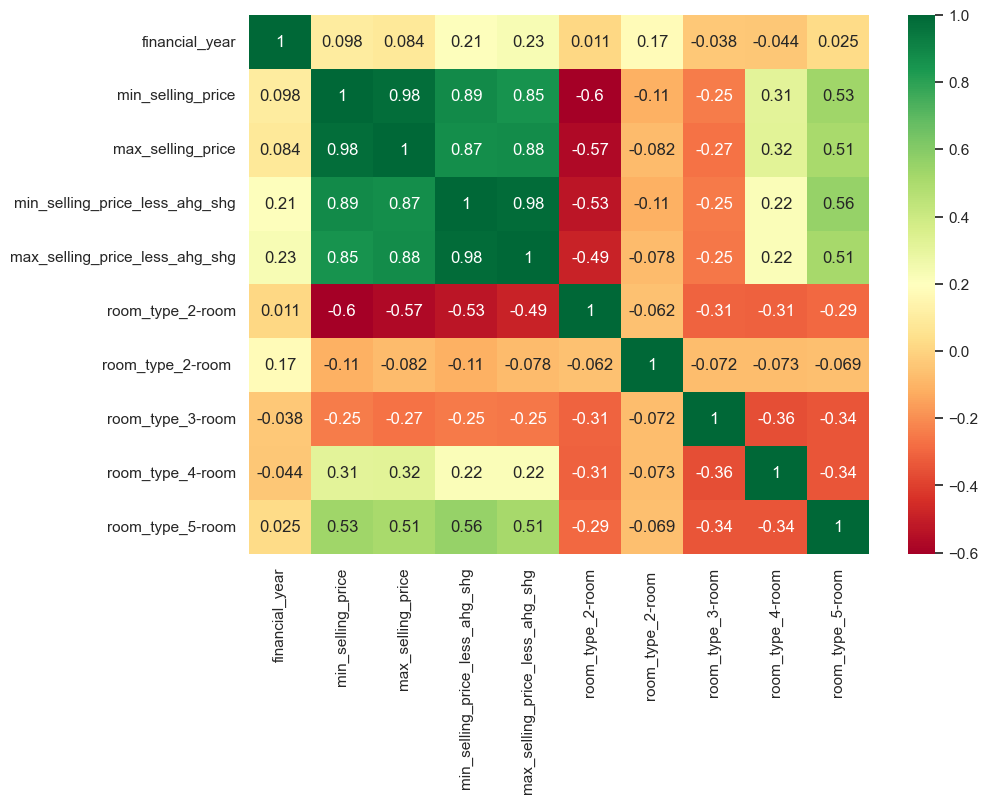

In [112]:
#Correlation map that shows the relationship between columns
plt.figure(figsize=(10,7))
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

***Histogram***

array([[<AxesSubplot:title={'center':'floor_area_sqm'}>,
        <AxesSubplot:title={'center':'lease_commence_date'}>],
       [<AxesSubplot:title={'center':'resale_price'}>, <AxesSubplot:>]],
      dtype=object)

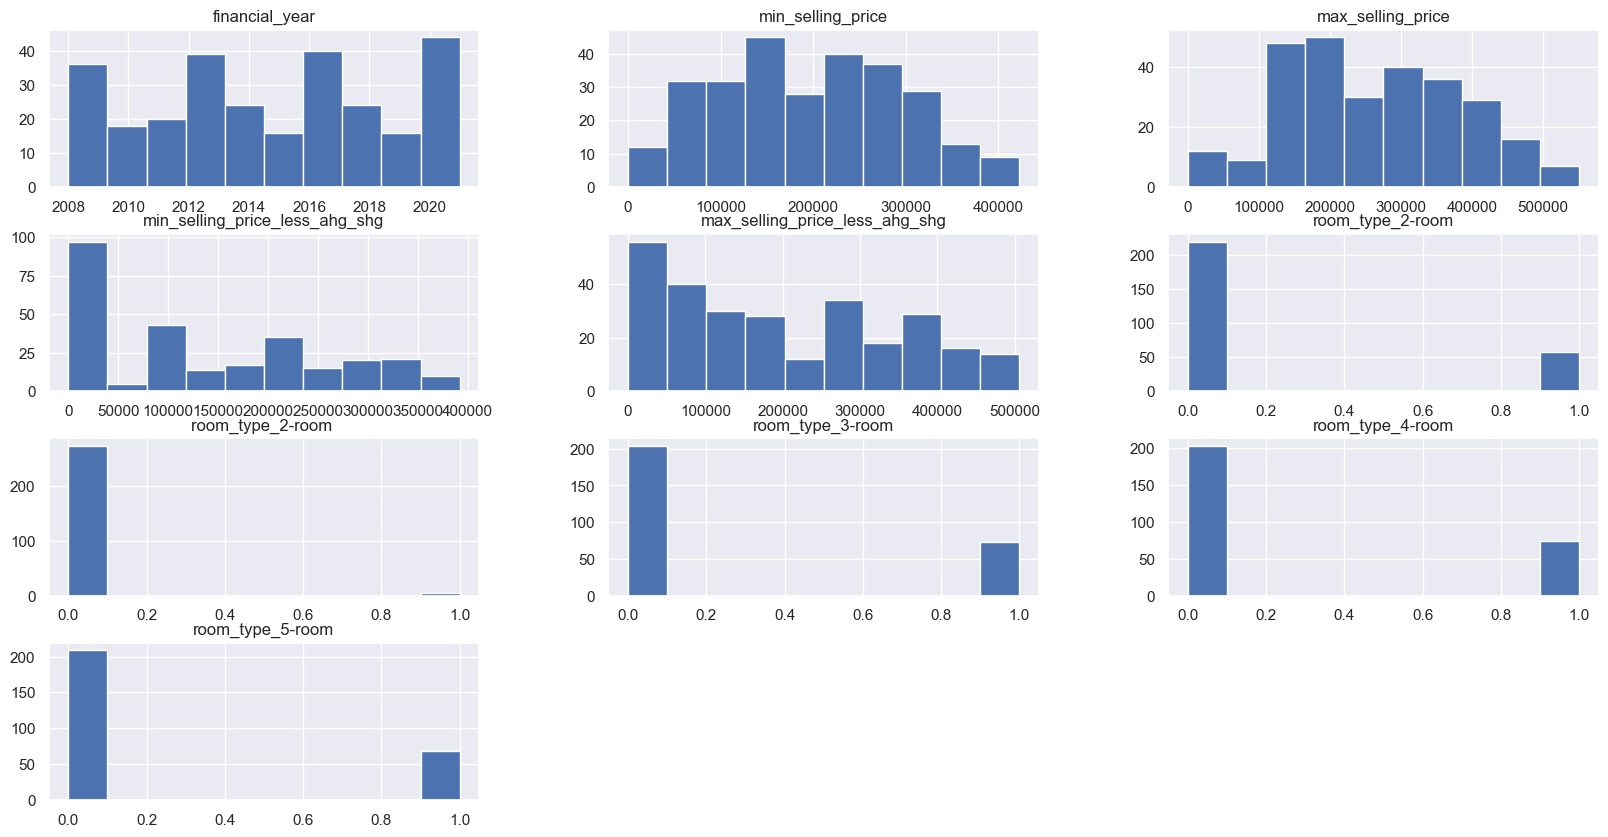

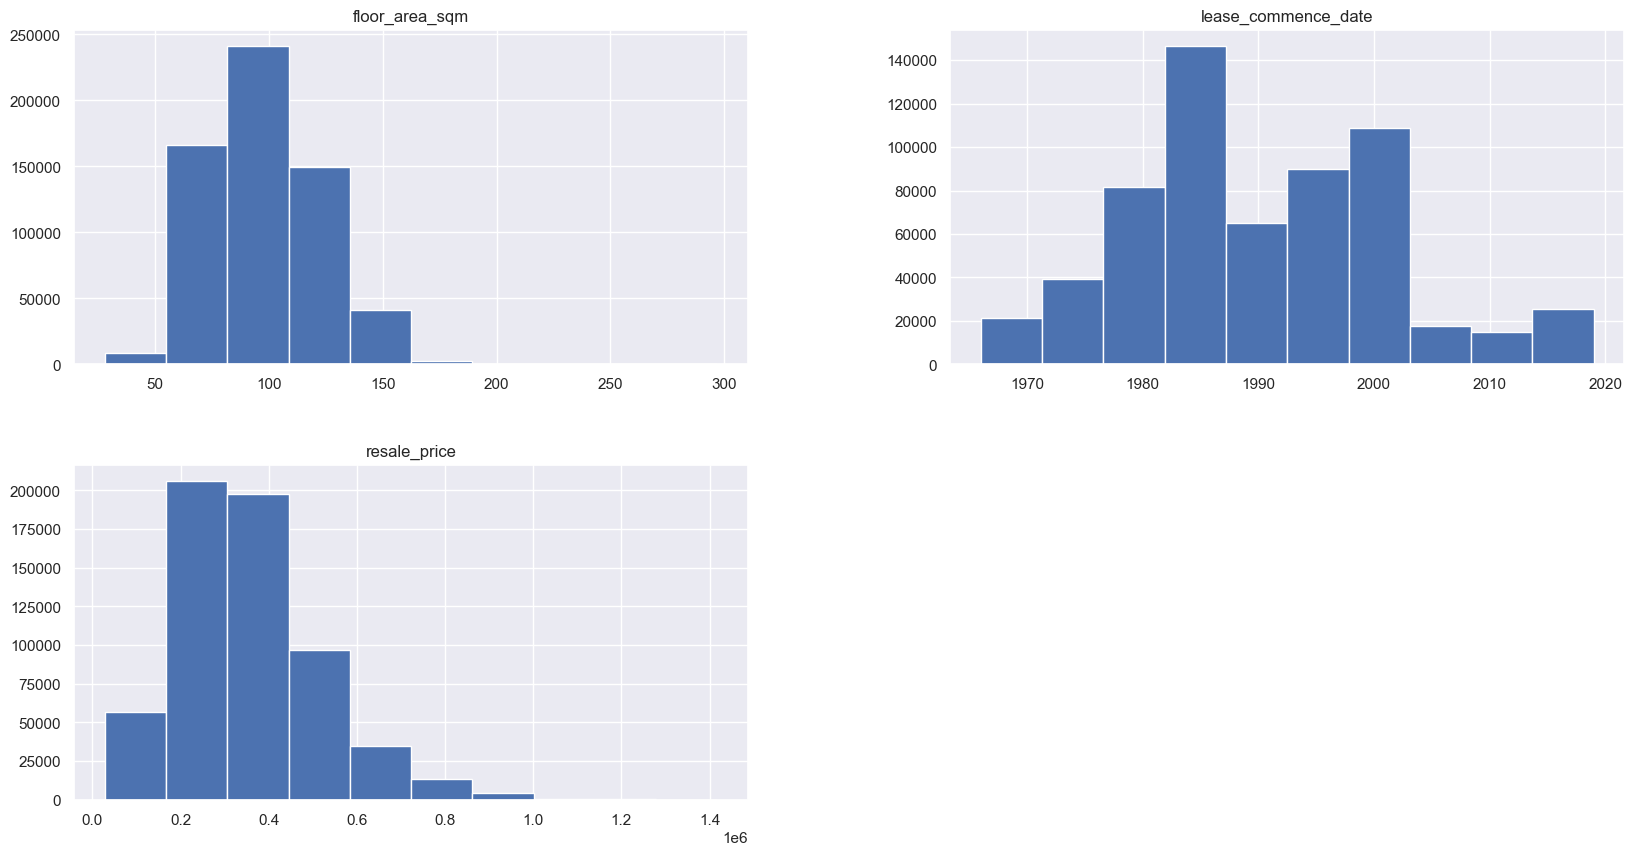

In [113]:
#Histogram that shows the values inside the columns
df.hist(figsize = (20,10))
result.hist(figsize = (20,10))

***Bar Chart***

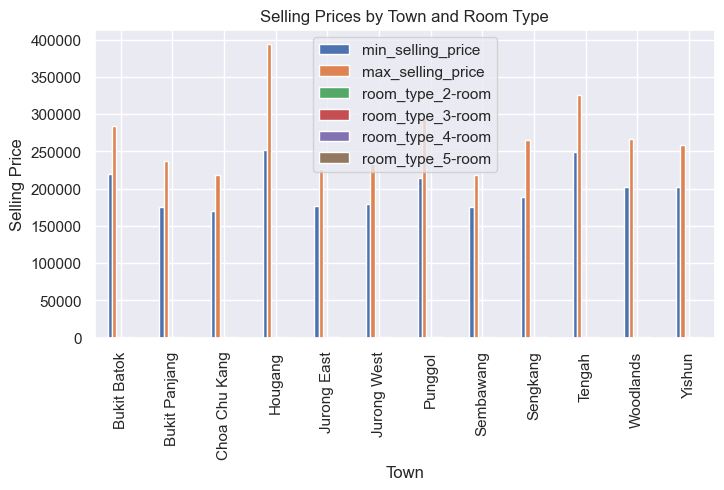

In [114]:
# Group the data by town and room type, and calculate the mean selling prices
grouped_data = df.groupby(['town']).mean()[['min_selling_price', 'max_selling_price', 'room_type_2-room', 'room_type_3-room', 'room_type_4-room', 'room_type_5-room']]

# Plot the bar chart
ax = grouped_data.plot(kind='bar', figsize=(8,4))

# Set the x-axis label
ax.set_xlabel('Town')

# Set the y-axis label
ax.set_ylabel('Selling Price')

# Set the title of the chart
ax.set_title('Selling Prices by Town and Room Type')

# Display the chart
plt.show()




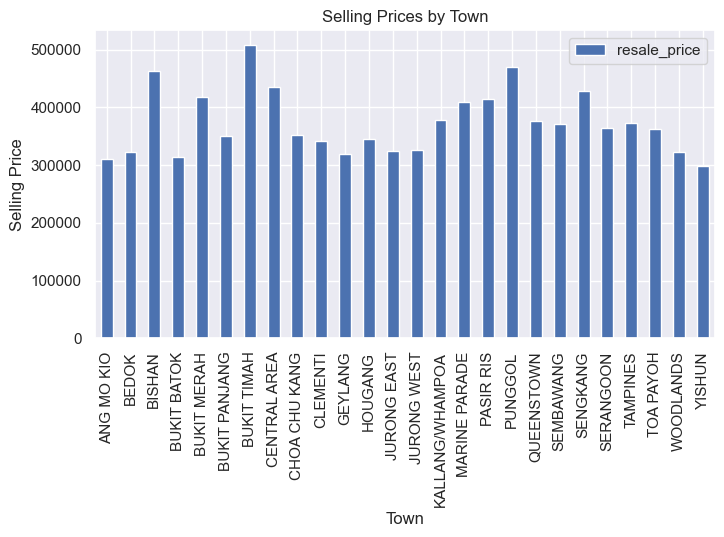

In [115]:
# Group the data by town and room type, and calculate the mean selling prices
grouped_result = result.groupby(['town']).mean()[['resale_price']]

# Plot the bar chart
ax2 = grouped_result.plot(kind='bar', figsize=(8,4))

# Set the x-axis label
ax2.set_xlabel('Town')

# Set the y-axis label
ax2.set_ylabel('Selling Price')

# Set the title of the chart
ax2.set_title('Selling Prices by Town')

# Display the chart
plt.show()

***Scatter Chart***

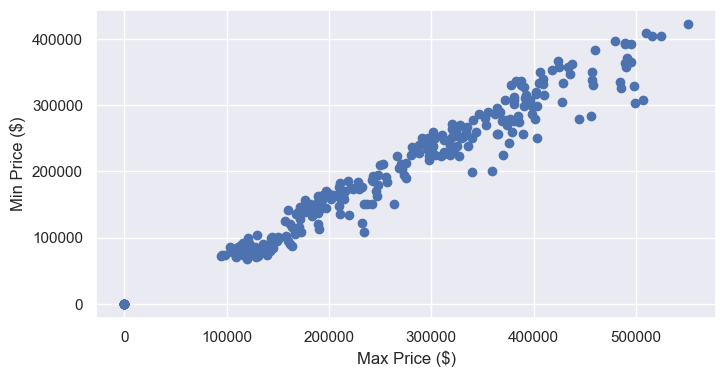

In [116]:
# create the scatter chart
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['max_selling_price'], df['min_selling_price'])
ax.set_xlabel('Max Price ($)')
ax.set_ylabel('Min Price ($)')
plt.show()

***Box Plot***

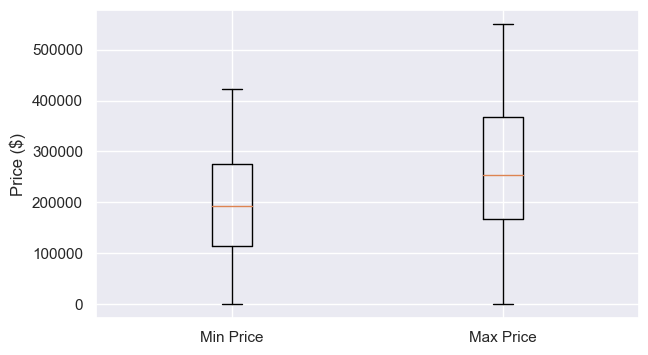

In [117]:
# create the boxplot
fig, ax = plt.subplots(figsize=(7,4))
ax.boxplot([df['min_selling_price'], df['max_selling_price']])
ax.set_xticklabels(['Min Price', 'Max Price'])
ax.set_ylabel('Price ($)')
plt.show()

***Stacked Area Chart***

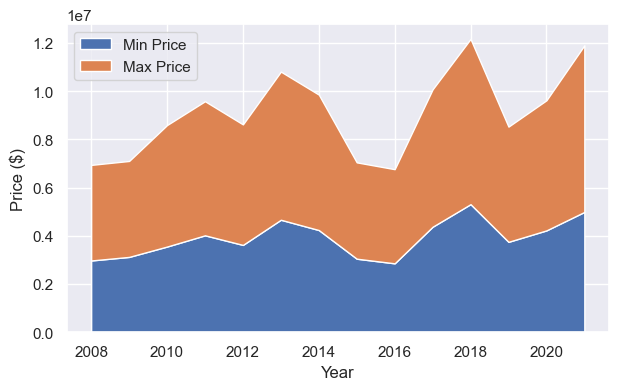

In [118]:
# group the data by year and sum the prices for each category
grouped = df.groupby('financial_year').sum()

# create the stacked area chart
fig, ax = plt.subplots(figsize=(7,4))
ax.stackplot(grouped.index, grouped['min_selling_price'], grouped['max_selling_price'], labels=['Min Price', 'Max Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price ($)')
ax.legend(loc='upper left')
plt.show()

### Data Modeling (Random Forest Regressor Model)

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Encode the categorical variable(s), if any
df = pd.get_dummies(df, columns=['town'])

# Split the data into training and testing sets
X = df.drop(['max_selling_price'], axis=1)
y = df['max_selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data, if needed
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5)

# Train the Random Forest model
rf.fit(X_train, y_train)

# Evaluate the performance of the Random Forest model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R^2:', r2)

MSE: 233047499.1647272
R^2: 0.9866348169555257


The MSE (Mean Squared Error) value of 236,853,155.40 suggests that on average, the model's predictions are off by approximately $486,7.34 (sqrt(236853155.40)). Whether or not this is a good score depends on the context of the problem and the domain-specific knowledge.

Similarly, the R^2 (coefficient of determination) value of 0.986 indicates that the model explains 98.6% of the variation in the data, which is considered a very good fit. 

***Predicting the House Prices from the trained Model***

In [120]:
# Collect information about the house features
financial_year = 2010
town = 'Ang Mo Kio'
min_selling_price = 120000
max_selling_price_less_ahg_shg = 0
room_type_2room = 0
room_type_3room = 1
room_type_4room = 0
room_type_5room = 0

# Create a DataFrame with the house features
house_features = pd.DataFrame({'financial_year': [financial_year],
                               'town_' + town: [1],
                               'min_selling_price': [min_selling_price],
                               'min_selling_price_less_ahg_shg': [max_selling_price_less_ahg_shg],
                               'room_type_2-room': [room_type_2room],
                               'room_type_3-room': [room_type_3room],
                               'room_type_4-room': [room_type_4room],
                               'room_type_5-room': [room_type_5room]})

# Ensure that the feature names match the names used during training
house_features = house_features.reindex(columns=X_train.columns, fill_value=0)

# Use the trained Random Forest model to predict the maximum selling price
predicted_max_selling_price = rf.predict(house_features)

# Print the predicted maximum selling price
print('Predicted maximum selling price:', predicted_max_selling_price)

Predicted maximum selling price: [166495.13005051]
